In [13]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    auc,
)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

In [14]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")


In [15]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [16]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)


In [17]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [19]:
# Initialize and train a Decision Tree Classifier
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = cart_model.predict(X_test)

In [21]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [22]:
# Extract true positives, false positives, true negatives, and false negatives
tp = conf_matrix[1, 1]  # True Positives
fp = conf_matrix[0, 1]  # False Positives
tn = conf_matrix[0, 0]  # True Negatives
fn = conf_matrix[1, 0]  # False Negatives

In [11]:
# Calculate Sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn)

In [12]:
# Calculate Specificity (True Negative Rate)
specificity = tn / (tn + fp)

In [13]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

In [14]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

In [15]:
# Calculate Precision with the correct positive label
precision = precision_score(y_test, y_pred, pos_label=10)

In [16]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, pos_label=10)

In [17]:
# Calculate Kappa Statistics
kappa = cohen_kappa_score(y_test, y_pred)

In [18]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)

In [19]:
# Map your labels to binary (0 and 1)
y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 10] = 0  # Map 10 to 0
y_test_binary[y_test_binary == 20] = 1  # Map 20 to 1

In [20]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, cart_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

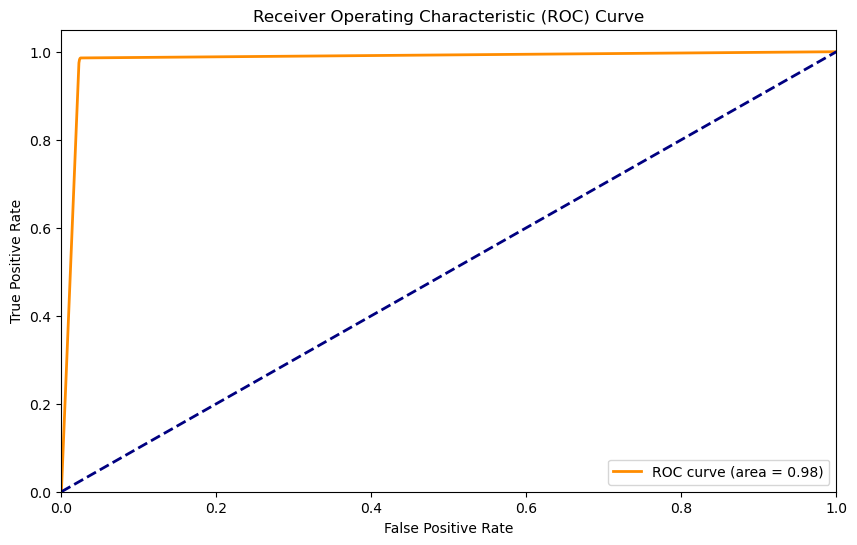

In [21]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Print the results
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Kappa Statistics: {kappa}")
print("Classification Report:")
print(class_report)
print(conf_matrix)

Sensitivity: 0.9851301115241635
Specificity: 0.975885455915599
ROC AUC: 0.9814835150982035
Accuracy: 0.9805389221556886
Precision: 0.9847908745247148
F1 Score: 0.9803179409538229
Kappa Statistics: 0.9610737224653683
Classification Report:
              precision    recall  f1-score   support

          10       0.98      0.98      0.98      1327
          20       0.98      0.99      0.98      1345

    accuracy                           0.98      2672
   macro avg       0.98      0.98      0.98      2672
weighted avg       0.98      0.98      0.98      2672

[[1295   32]
 [  20 1325]]


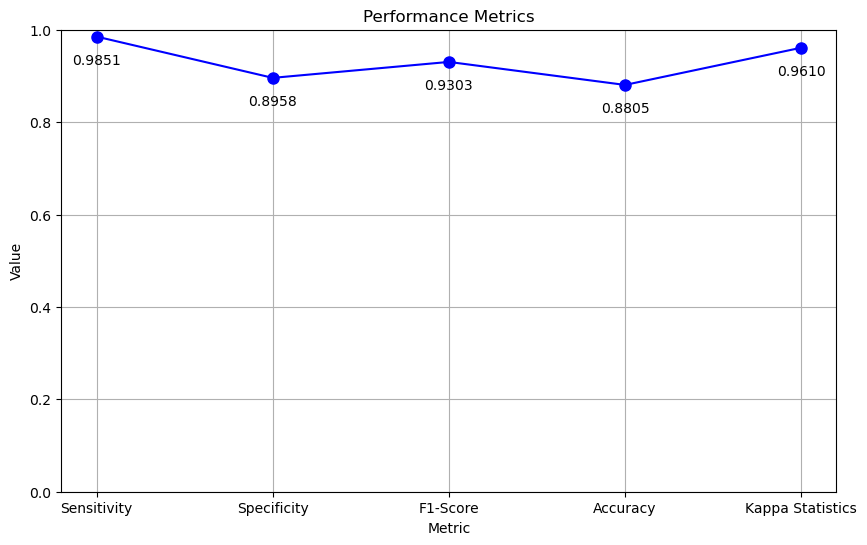

In [27]:
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Sensitivity', 'Specificity', 'F1-Score', 'Accuracy', 'Kappa Statistics']
values = [0.9851, 0.8958, 0.9303, 0.8805, 0.9610]

# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.0)  # Set the y-axis range to show values touching the top
plt.grid(True)

# Add labels below the data points
for i, value in enumerate(values):
    plt.annotate(f'{value:.4f}', (metrics[i], value), textcoords="offset points", xytext=(0, -20), ha='center')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/CART/line chart test data.svg", format='svg')


# Show the plot
plt.show()

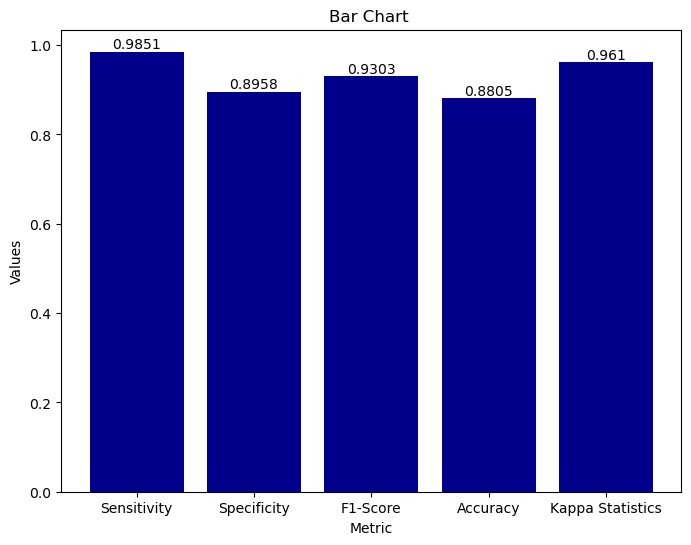

In [28]:
# Create a bar chart
# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue


# Create a bar chart with dark blue color
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=dark_blue)

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Bar Chart ")

# Add values at the middle of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

# Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/CART/bar chart test data.svg", format='svg')
    
    
# Show the plot
plt.show()